## Bias-Variance tradeoff


Underfitting :
- Error due to overly simplistic model
- Algorith might loose relevant relations between feature and target
- High _Bias_, Low Variance

Variance : 
- The model is too complex
- Algorithm fits on training data too much, even captures the noice
- High _Variance_, Low Bias

Balance is very important.
To Avoid Overfitting:
- Choose a model which is not too complex.
- Regularization
- Cross-Validation (use different chunks of data as training and testing data)
- Early Stopping (Stop as soon as improvement in training accuracy does not reflect on validation accuracy)

Bias:
- Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.
- A model with high bias pays very little attention to the training data and oversimplifies the model.

Variance:
- Variance is the variability of model prediction for a given data point or a value that tells us the spread of our data.
- A model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("data/House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [14]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [15]:
# as we want to predict the price only.(here data is training data only)
data = df.drop(columns=['Price'])
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67


In [16]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,-1.634815,-1.68613,0.661360,0.481139,0.885428,-0.292558,-0.004305,-0.087866,-0.304128,2.363771,...,1.590720,-2.099975,-0.218469,-1.523222,0.690494,-0.467051,0.684979,-0.335939,-0.014982,-1.561292
1,-1.576613,-1.68613,1.726750,0.805845,0.874655,-0.148042,-0.004305,-0.087866,-0.304128,-0.648167,...,-0.660973,-1.082707,-0.218469,-1.523222,0.671588,-0.452898,1.365099,-0.236162,-1.238547,-1.337474
2,-1.318955,-1.68613,0.661360,0.481139,1.305602,0.735881,0.921239,-0.087866,-0.304128,-0.648167,...,-0.660973,1.019648,-0.218469,-1.470814,1.166059,0.587292,1.958395,1.154832,1.208583,1.236435
3,-1.268610,-1.68613,-0.404031,-0.168272,0.659181,-0.279373,-0.004305,-0.087866,-0.304128,0.857802,...,1.189428,-1.421796,-0.218469,-1.418405,0.813385,-0.573192,0.091683,-0.316751,-1.238547,-1.561292
4,-1.238788,-1.68613,-0.404031,0.481139,0.540670,-0.272780,-0.929849,-0.087866,-0.304128,0.857802,...,1.345486,-0.675799,-0.218469,-1.365996,0.875921,-1.316186,0.554744,-0.307157,-1.238547,0.229253


In [17]:
# On day 15 we observed that there 5 nicely correlated columns, so we should do PCA
n_comps = 5
pca = PCA(n_components=n_comps)
pca_df = pd.DataFrame(pca.fit_transform(scaled_data),columns = [f"PC {i}" for i in range(n_comps)])
pca_df['Target'] = df['Price']
pca_df.head()

,PC 0,PC 1,PC 2,PC 3,PC 4,Target
0,1.098375,3.289268,-0.492013,1.523821,1.693005,1400000
1,2.361973,0.880479,-1.138270,1.304638,0.474188,1200000
2,3.826768,-0.806040,-0.342757,2.020257,-0.374481,838000
3,0.397887,2.165297,-0.780254,1.595963,0.542403,805000
4,0.816276,2.434328,-0.830453,1.330817,0.685659,790000


In [22]:
X = pca_df.drop(columns=['Target'])
y = pca_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(X_train, X_test, y_train, y_test, sep='\n')

In [23]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X = X_test)
print(y_pred, y_test, sep='\n')

[613875.27751559 576950.61190297 475831.89590591 ... 183118.40970742
 601024.01131999 254700.40436793]
7983     546800
6466     550000
10306    399950
1217     940000
12463    545000
          ...  
9415     350000
1901     475000
1180     300000
13969    499000
7182     380000
Name: Target, Length: 4386, dtype: int64


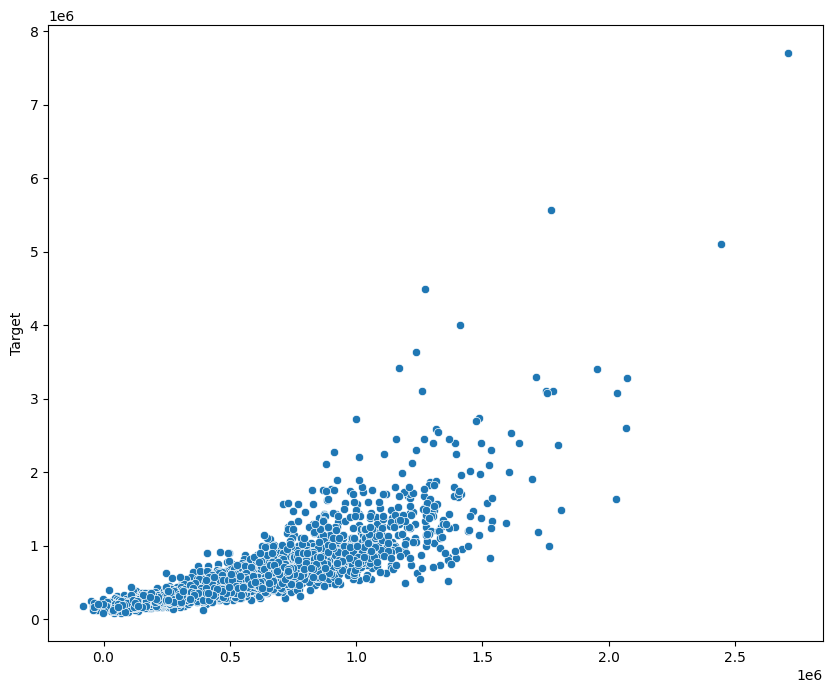

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(y=y_test,x=y_pred)
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"{mse=}, {mae=}")

mse=49228596920.4507, mae=115709.41143123472


The best MSE on day15 was *64067902379.22244*
and the best MAE was *155556.01612550256*

In [28]:
print(f"Improvement in MSE: {64067902379.22244/mse} and in MAE: {155556.01612550256/mae}")

Improvement in MSE: 1.3014366930414616 and in MAE: 1.3443678798586611


In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# If we try using nearest neighbors
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [31]:
knn_pred = knnr.predict(X_test)
print(knn_pred, y_test, sep="\n")

[596570. 562300. 484055. ... 261085. 441610. 360185.]
7983     546800
6466     550000
10306    399950
1217     940000
12463    545000
          ...  
9415     350000
1901     475000
1180     300000
13969    499000
7182     380000
Name: Target, Length: 4386, dtype: int64


In [32]:
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
print(f"{knn_mse=}, {knn_mae=}")

knn_mse=36448520931.1931, knn_mae=84272.35501595988


In [34]:
print(
    f"Improvement in MSE: {mse/knn_mse} and in MAE: {knn_mae/mae}"
)

Improvement in MSE: 1.3506335967208 and in MAE: 0.7283102901793113


### We can see how the number of neighbors affect the errors
- First, we will biuld a predictor function and then we will store the results
- then we will plot a bar graph to see thre results

In [39]:
def knn_predictor(padosi:int)->tuple: # will return mse and mae
    # If we try using nearest neighbors
    knnr = KNeighborsRegressor(n_neighbors=padosi)
    knnr.fit(X_train, y_train)
    knn_pred = knnr.predict(X_test)
    return mean_squared_error(y_test, knn_pred), mean_absolute_error(y_test, knn_pred)

In [61]:
results = []
for i in range(3,33,2):
    results.append((i,) + knn_predictor(i))

results

[(3, 36256028763.26169, 88533.41130870953),
 (5, 36437757653.67982, 85640.37738258093),
 (7, 36679118414.91756, 84511.16051071591),
 (9, 36739049793.03239, 84062.09801388255),
 (11, 36339080623.63152, 84249.52814741118),
 (13, 35798825809.936325, 84228.79436318355),
 (15, 36314470322.99624, 84565.86996504029),
 (17, 36825966362.20559, 84671.58205252005),
 (19, 36970952197.65418, 84873.21062231503),
 (21, 36920663847.51008, 84822.100427768),
 (23, 37126210954.85495, 85005.98291004976),
 (25, 37389264308.554115, 85306.0483629731),
 (27, 38015467936.0974, 85621.20524902467),
 (29, 38193202112.7802, 86048.44392031072),
 (31, 38347349697.9677, 86374.08994895783)]

In [62]:
results_df = pd.DataFrame(results)
results_df.columns = ['Neighbors', 'MSE', 'MAE']
results_df

,Neighbors,MSE,MAE
0,3,3.625603e+10,88533.411309
1,5,3.643776e+10,85640.377383
2,7,3.667912e+10,84511.160511
3,9,3.673905e+10,84062.098014
4,11,3.633908e+10,84249.528147
5,13,3.579883e+10,84228.794363
6,15,3.631447e+10,84565.869965
7,17,3.682597e+10,84671.582053
8,19,3.697095e+10,84873.210622
9,21,3.692066e+10,84822.100428


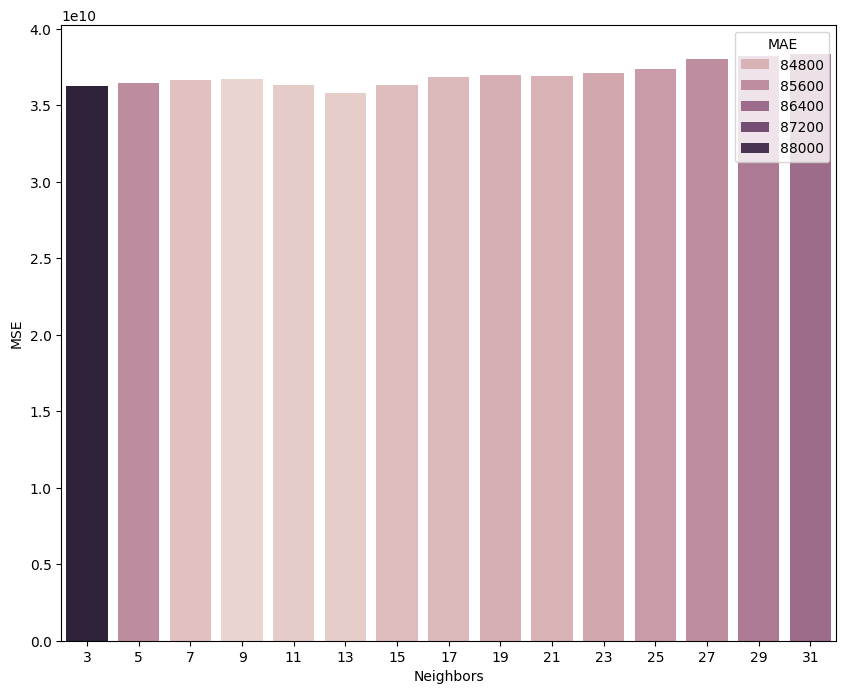

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=results_df['Neighbors'], y=results_df['MSE'], hue=results_df['MAE'])
plt.show()